Notebook Metadata & Imports

In [152]:
# Cell 1: Notebook setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
# Plot styling
sns.set(style="whitegrid")
%matplotlib inline

print("Libraries loaded successfully")


Libraries loaded successfully


Load All Datasets

In [153]:
# Cell 2: Load CSVs
flight_df   = pd.read_csv('./data/Flight_Level_Data.csv', 
                          parse_dates=['scheduled_departure_datetime_local',
                                       'actual_departure_datetime_local'])
pnr_df      = pd.read_csv('./data/PNR_Flight_Level_Data.csv')
remarks_df  = pd.read_csv('./data/PNR_Remark_Level_Data.csv')
bag_df      = pd.read_csv('./data/Bag_Level_Data.csv')
airport_df  = pd.read_csv('./data/Airports_Data.csv')

# Display row counts
print(f"Flights: {len(flight_df)} rows")
print(f"PNR records: {len(pnr_df)} rows")
print(f"SSR remarks: {len(remarks_df)} rows")
print(f"Bag records: {len(bag_df)} rows")
print(f"Airports: {len(airport_df)} rows")


Flights: 8099 rows
PNR records: 687878 rows
SSR remarks: 51698 rows
Bag records: 687245 rows
Airports: 5612 rows


In [154]:
remarks_df

,record_locator,pnr_creation_date,flight_number,special_service_request
0,PNR_153489,2025-07-04,308,Airport Wheelchair
1,PNR_153489,2025-07-04,2182,Airport Wheelchair
2,PNR_153508,2025-07-10,2649,Airport Wheelchair
3,PNR_153508,2025-07-10,2100,Airport Wheelchair
4,PNR_153521,2025-03-01,970,Unaccompanied Minor
...,...,...,...,...
51693,PNR_610754,2025-03-16,9,Airport Wheelchair
51694,PNR_610754,2025-03-16,12,Airport Wheelchair
51695,PNR_610754,2025-03-16,4784,Airport Wheelchair
51696,PNR_610754,2025-03-16,5382,Airport Wheelchair


In [155]:
flight_df

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,scheduled_departure_datetime_local,scheduled_arrival_datetime_local,actual_departure_datetime_local,actual_arrival_datetime_local,total_seats,fleet_type,carrier,scheduled_ground_time_minutes,actual_ground_time_minutes,minimum_turn_minutes
0,OO,4792,2025-08-04,ORD,ROA,2025-08-04 17:57:00+00:00,2025-08-04T21:04:00Z,2025-08-04 18:04:00+00:00,2025-08-04T20:52:00Z,76,ERJ-175,Express,42,34,34
1,UA,920,2025-08-03,ORD,LHR,2025-08-03 18:05:00+00:00,2025-08-04T08:20:00Z,2025-08-03 18:27:00+00:00,2025-08-04T08:06:00Z,167,B767-300,Mainline,235,229,145
2,UA,1776,2025-08-10,ORD,PHL,2025-08-10 18:20:00+00:00,2025-08-10T21:35:00Z,2025-08-10 20:11:00+00:00,2025-08-10T23:26:00Z,166,B737-800,Mainline,76,69,51
3,OO,5790,2025-08-06,ORD,CRW,2025-08-06 18:20:00+00:00,2025-08-06T21:04:00Z,2025-08-06 20:05:00+00:00,2025-08-06T22:42:00Z,50,CRJ-200,Express,223,38,29
4,UA,1398,2025-08-05,ORD,ATL,2025-08-05 18:20:00+00:00,2025-08-05T21:29:00Z,2025-08-05 18:16:00+00:00,2025-08-05T21:49:00Z,166,B737-800,Mainline,75,72,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8094,OO,5027,2025-08-15,ORD,MCW,2025-08-15 07:45:00+00:00,2025-08-15T09:14:00Z,2025-08-15 07:32:00+00:00,2025-08-15T09:03:00Z,50,CRJ-200,Express,52,64,29
8095,OO,5037,2025-08-10,ORD,LAF,2025-08-10 12:14:00+00:00,2025-08-10T14:12:00Z,2025-08-10 12:04:00+00:00,2025-08-10T13:57:00Z,50,CRJ-200,Express,24,48,29
8096,OO,5135,2025-08-15,ORD,MCW,2025-08-15 16:50:00+00:00,2025-08-15T18:20:00Z,2025-08-15 17:53:00+00:00,2025-08-15T19:16:00Z,50,CRJ-200,Express,-16,28,29
8097,OO,5027,2025-08-06,ORD,MCW,2025-08-06 07:45:00+00:00,2025-08-06T09:14:00Z,2025-08-06 07:31:00+00:00,2025-08-06T09:01:00Z,50,CRJ-200,Express,52,60,29


In [156]:
flight_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8099 entries, 0 to 8098
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   company_id                          8099 non-null   object             
 1   flight_number                       8099 non-null   int64              
 2   scheduled_departure_date_local      8099 non-null   object             
 3   scheduled_departure_station_code    8099 non-null   object             
 4   scheduled_arrival_station_code      8099 non-null   object             
 5   scheduled_departure_datetime_local  8099 non-null   datetime64[ns, UTC]
 6   scheduled_arrival_datetime_local    8099 non-null   object             
 7   actual_departure_datetime_local     8099 non-null   datetime64[ns, UTC]
 8   actual_arrival_datetime_local       8099 non-null   object             
 9   total_seats                         8099 

In [157]:
# Compute departure delay in minutes
flight_df['departure_delay_min'] = (flight_df['actual_departure_datetime_local'] - flight_df['scheduled_departure_datetime_local']).dt.total_seconds() / 60

# Flag if the flight is late
flight_df['is_late'] = flight_df['departure_delay_min'] > 0
#flight_df['On time'] = flight_df['departure_delay_min'] = 0

# Compute ground time pressure
# Difference between scheduled ground time and minimum turn minutes
flight_df['ground_time_pressure'] = flight_df['scheduled_ground_time_minutes'] - flight_df['minimum_turn_minutes']

# Flag if ground time is tight
flight_df['tight_turn'] = flight_df['ground_time_pressure'] < 0


In [158]:
flight_df

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,scheduled_departure_datetime_local,scheduled_arrival_datetime_local,actual_departure_datetime_local,actual_arrival_datetime_local,total_seats,fleet_type,carrier,scheduled_ground_time_minutes,actual_ground_time_minutes,minimum_turn_minutes,departure_delay_min,is_late,ground_time_pressure,tight_turn
0,OO,4792,2025-08-04,ORD,ROA,2025-08-04 17:57:00+00:00,2025-08-04T21:04:00Z,2025-08-04 18:04:00+00:00,2025-08-04T20:52:00Z,76,ERJ-175,Express,42,34,34,7.0,True,8,False
1,UA,920,2025-08-03,ORD,LHR,2025-08-03 18:05:00+00:00,2025-08-04T08:20:00Z,2025-08-03 18:27:00+00:00,2025-08-04T08:06:00Z,167,B767-300,Mainline,235,229,145,22.0,True,90,False
2,UA,1776,2025-08-10,ORD,PHL,2025-08-10 18:20:00+00:00,2025-08-10T21:35:00Z,2025-08-10 20:11:00+00:00,2025-08-10T23:26:00Z,166,B737-800,Mainline,76,69,51,111.0,True,25,False
3,OO,5790,2025-08-06,ORD,CRW,2025-08-06 18:20:00+00:00,2025-08-06T21:04:00Z,2025-08-06 20:05:00+00:00,2025-08-06T22:42:00Z,50,CRJ-200,Express,223,38,29,105.0,True,194,False
4,UA,1398,2025-08-05,ORD,ATL,2025-08-05 18:20:00+00:00,2025-08-05T21:29:00Z,2025-08-05 18:16:00+00:00,2025-08-05T21:49:00Z,166,B737-800,Mainline,75,72,51,-4.0,False,24,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8094,OO,5027,2025-08-15,ORD,MCW,2025-08-15 07:45:00+00:00,2025-08-15T09:14:00Z,2025-08-15 07:32:00+00:00,2025-08-15T09:03:00Z,50,CRJ-200,Express,52,64,29,-13.0,False,23,False
8095,OO,5037,2025-08-10,ORD,LAF,2025-08-10 12:14:00+00:00,2025-08-10T14:12:00Z,2025-08-10 12:04:00+00:00,2025-08-10T13:57:00Z,50,CRJ-200,Express,24,48,29,-10.0,False,-5,True
8096,OO,5135,2025-08-15,ORD,MCW,2025-08-15 16:50:00+00:00,2025-08-15T18:20:00Z,2025-08-15 17:53:00+00:00,2025-08-15T19:16:00Z,50,CRJ-200,Express,-16,28,29,63.0,True,-45,True
8097,OO,5027,2025-08-06,ORD,MCW,2025-08-06 07:45:00+00:00,2025-08-06T09:14:00Z,2025-08-06 07:31:00+00:00,2025-08-06T09:01:00Z,50,CRJ-200,Express,52,60,29,-14.0,False,23,False


In [159]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8099 entries, 0 to 8098
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   company_id                          8099 non-null   object             
 1   flight_number                       8099 non-null   int64              
 2   scheduled_departure_date_local      8099 non-null   object             
 3   scheduled_departure_station_code    8099 non-null   object             
 4   scheduled_arrival_station_code      8099 non-null   object             
 5   scheduled_departure_datetime_local  8099 non-null   datetime64[ns, UTC]
 6   scheduled_arrival_datetime_local    8099 non-null   object             
 7   actual_departure_datetime_local     8099 non-null   datetime64[ns, UTC]
 8   actual_arrival_datetime_local       8099 non-null   object             
 9   total_seats                         8099 

In [160]:
pnr_df

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,record_locator,pnr_creation_date,total_pax,is_child,basic_economy_ind,is_stroller_user,lap_child_count
0,UA,2494,2025-08-04,ORD,MCI,PNR_520583,2025-07-07,1,N,0,N,0
1,UA,2483,2025-08-06,ORD,IAH,PNR_296107,2025-03-28,1,N,0,N,0
2,UA,1620,2025-08-01,ORD,SEA,PNR_296108,2025-06-30,4,Y,0,N,0
3,UA,1620,2025-08-01,ORD,SEA,PNR_296108,2025-06-30,4,N,0,N,1
4,UA,1620,2025-08-01,ORD,SEA,PNR_296108,2025-06-30,4,Y,0,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...
687873,UA,291,2025-08-03,ORD,BDL,PNR_271652,2025-07-17,1,N,0,N,0
687874,UA,1139,2025-08-07,ORD,DSM,PNR_363174,2025-07-06,2,Y,0,Y,0
687875,UA,1139,2025-08-07,ORD,DSM,PNR_363174,2025-07-06,2,Y,0,N,0
687876,UA,1139,2025-08-07,ORD,DSM,PNR_363174,2025-07-06,2,N,0,N,0


In [161]:
remarks_df

,record_locator,pnr_creation_date,flight_number,special_service_request
0,PNR_153489,2025-07-04,308,Airport Wheelchair
1,PNR_153489,2025-07-04,2182,Airport Wheelchair
2,PNR_153508,2025-07-10,2649,Airport Wheelchair
3,PNR_153508,2025-07-10,2100,Airport Wheelchair
4,PNR_153521,2025-03-01,970,Unaccompanied Minor
...,...,...,...,...
51693,PNR_610754,2025-03-16,9,Airport Wheelchair
51694,PNR_610754,2025-03-16,12,Airport Wheelchair
51695,PNR_610754,2025-03-16,4784,Airport Wheelchair
51696,PNR_610754,2025-03-16,5382,Airport Wheelchair


In [162]:
bag_df

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,bag_tag_unique_number,bag_tag_issue_date,bag_type
0,UA,1068,2025-08-01,ORD,IAD,BAGTAG_418666,2025-07-27,Transfer
1,UA,622,2025-08-01,ORD,DEN,BAGTAG_418667,2025-07-28,Transfer
2,YX,3718,2025-08-01,ORD,MSN,BAGTAG_84760,2025-07-28,Transfer
3,BA,294,2025-08-01,ORD,LHR,BAGTAG_418669,2025-07-28,Transfer
4,UA,2627,2025-08-01,ORD,MSP,BAGTAG_335257,2025-07-28,Transfer
...,...,...,...,...,...,...,...,...
687240,OO,5138,2025-08-15,ORD,MGW,BAGTAG_668154,2025-08-16,Origin
687241,OO,5138,2025-08-15,ORD,MGW,BAGTAG_335255,2025-08-16,Origin
687242,OO,5138,2025-08-15,ORD,MGW,BAGTAG_335256,2025-08-16,Origin
687243,OO,5138,2025-08-15,ORD,MGW,BAGTAG_168496,2025-08-16,Origin


In [163]:
bag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687245 entries, 0 to 687244
Data columns (total 8 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   company_id                        687245 non-null  object
 1   flight_number                     687245 non-null  int64 
 2   scheduled_departure_date_local    687245 non-null  object
 3   scheduled_departure_station_code  687245 non-null  object
 4   scheduled_arrival_station_code    687245 non-null  object
 5   bag_tag_unique_number             687245 non-null  object
 6   bag_tag_issue_date                687245 non-null  object
 7   bag_type                          687245 non-null  object
dtypes: int64(1), object(7)
memory usage: 41.9+ MB


In [164]:
bag_df['scheduled_departure_date_local']=pd.to_datetime(bag_df['scheduled_departure_date_local'])
bag_df['bag_tag_issue_date']=pd.to_datetime(bag_df['bag_tag_issue_date'])

In [191]:
bag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687245 entries, 0 to 687244
Data columns (total 8 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   company_id                        687245 non-null  object        
 1   flight_number                     687245 non-null  int64         
 2   scheduled_departure_date_local    687245 non-null  datetime64[ns]
 3   scheduled_departure_station_code  687245 non-null  object        
 4   scheduled_arrival_station_code    687245 non-null  object        
 5   bag_tag_unique_number             687245 non-null  object        
 6   bag_tag_issue_date                687245 non-null  datetime64[ns]
 7   bag_type                          687245 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 41.9+ MB


Compute average departure delay (in minutes)

In [165]:
flight_df['departure_delay_min'].describe()

count    8099.000000
mean       21.184961
std        62.169868
min       -17.000000
25%        -4.000000
50%         0.000000
75%        18.000000
max      1017.000000
Name: departure_delay_min, dtype: float64

In [166]:
# Average, min, and max departure delay
avg_delay = flight_df["departure_delay_min"].mean()
min_delay = flight_df["departure_delay_min"].min()
max_delay = flight_df["departure_delay_min"].max()

# Percentage of flights departing late
pct_late = flight_df["is_late"].mean() * 100

print(f"Average departure delay: {avg_delay:.2f} minutes")
print(f"Minimum departure delay: {min_delay:.2f} minutes")
print(f"Maximum departure delay: {max_delay:.2f} minutes")
print(f"Percentage of flights departing late: {pct_late:.1f}%")

Average departure delay: 21.18 minutes
Minimum departure delay: -17.00 minutes
Maximum departure delay: 1017.00 minutes
Percentage of flights departing late: 49.6%


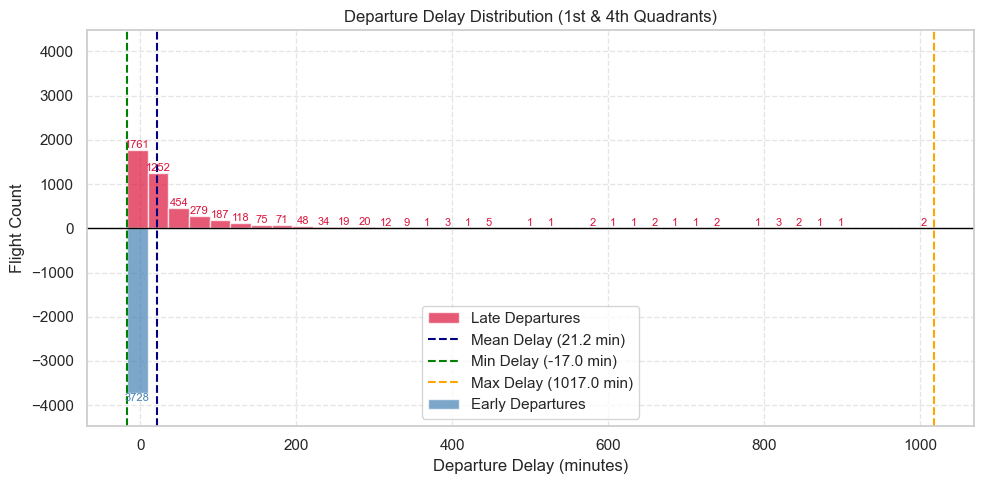

In [167]:
# Split early and late
early = flight_df[flight_df["departure_delay_min"] < 0]["departure_delay_min"]
late = flight_df[flight_df["departure_delay_min"] >= 0]["departure_delay_min"]

# Common bins
bins = np.linspace(min_delay, max_delay, 40)

plt.figure(figsize=(10,5))

# Late flights (1st quadrant)
counts_late, edges, _ = plt.hist(late, bins=bins, color='crimson', alpha=0.7, label='Late Departures')

# Early flights (4th quadrant)
counts_early, _ = np.histogram(early, bins=bins)
bar_positions = (edges[:-1] + edges[1:]) / 2
plt.bar(bar_positions, -counts_early, width=np.diff(edges), color='steelblue', alpha=0.7, label='Early Departures')

# Add labels for each bar
for x, y in zip(bar_positions, counts_late):
    if y > 0:
        plt.text(x, y + 2, str(int(y)), ha='center', va='bottom', fontsize=8, color='crimson')
for x, y in zip(bar_positions, counts_early):
    if y > 0:
        plt.text(x, -y - 4, str(int(y)), ha='center', va='top', fontsize=8, color='steelblue')

# Add vertical lines for mean, min, max
plt.axvline(avg_delay, color="navy", linestyle="--", label=f"Mean Delay ({avg_delay:.1f} min)")
plt.axvline(min_delay, color="green", linestyle="--", label=f"Min Delay ({min_delay:.1f} min)")
plt.axvline(max_delay, color="orange", linestyle="--", label=f"Max Delay ({max_delay:.1f} min)")

# Axis and layout
plt.axhline(0, color='black', linewidth=1)
ylim = max(np.max(counts_late), np.max(counts_early)) * 1.2
plt.ylim(-ylim, ylim)
plt.title("Departure Delay Distribution (1st & 4th Quadrants)")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Flight Count")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [168]:
def categorize_flight(delay):
    if delay < 0:
        return "Early"
    elif delay == 0:
        return "On Time"
    else:
        return "Late"

flight_df["ontime"] = flight_df["departure_delay_min"].apply(categorize_flight)

#flight_df[['departure_delay_min','ontime']]
unique_val=flight_df['ontime'].unique()
print(f"{unique_val}")

['Late' 'Early' 'On Time']


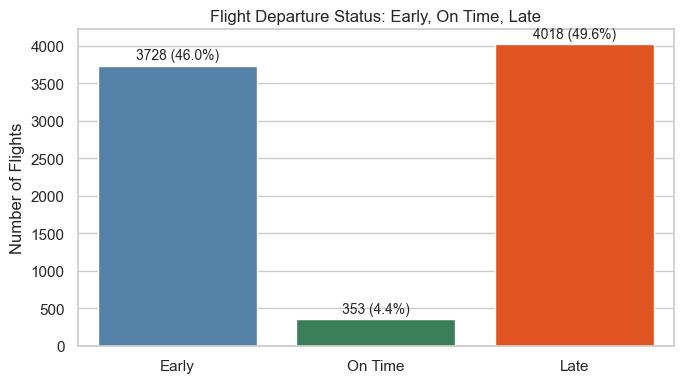

In [169]:
# Count flights per category
status_counts = flight_df["ontime"].value_counts().reindex(["Early", "On Time", "Late"])
status_df = pd.DataFrame({
    "Status": status_counts.index,
    "Count": status_counts.values
})

# Calculate percentages
status_df["Percent"] = (status_df["Count"] / status_df["Count"].sum() * 100).round(1)

# Plot bar graph
plt.figure(figsize=(7,4))
sns.barplot(
    data=status_df,
    x="Status",
    y="Count",
    hue='Status',
    palette={"Early": "steelblue", "On Time": "seagreen", "Late": "orangered"}
)

# Add labels
for i, row in status_df.iterrows():
    plt.text(i, row["Count"] + 50, f"{row['Count']} ({row['Percent']}%)",
             ha='center', va='bottom', fontsize=10)

plt.title("Flight Departure Status: Early, On Time, Late")
plt.ylabel("Number of Flights")
plt.xlabel("")
plt.tight_layout()
plt.show()

Flights with scheduled ground time ≤ minimum turn minutes: 652 (8.1%)
Flights within 10% above minimum turn minutes: 780 (9.6%)
Flights in 10% buffer only (above min turn but ≤110%): 128 (1.6%)

Example strict flights (≤min turn):
    flight_number  scheduled_ground_time_minutes  minimum_turn_minutes
27           3700                              5                    34
38           4546                             -5                    29
51           2177                              9                    43
63            767                             22                    62
98           4590                            -20                    29 

Example buffer-only flights (>min turn, ≤110%):
     flight_number  scheduled_ground_time_minutes  minimum_turn_minutes
213           1564                            130                   119
224           2090                             61                    57
228           2011                             62                    60
232  

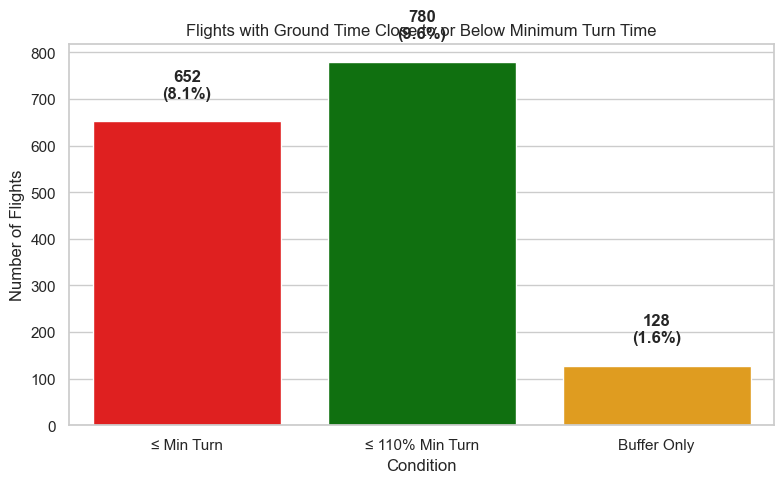

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming flight_df is already loaded and has:
# 'scheduled_ground_time_minutes' and 'minimum_turn_minutes'

# Strict: Scheduled ground time less than or equal to minimum turn minutes
flight_df['ground_time_pressure_strict'] = (
    flight_df['scheduled_ground_time_minutes'] <= flight_df['minimum_turn_minutes']
)

# Loose: Scheduled ground time within 10% above minimum turn minutes
flight_df['ground_time_pressure_loose'] = (
    flight_df['scheduled_ground_time_minutes'] <= flight_df['minimum_turn_minutes'] * 1.1
)

# Count flights
n_strict = flight_df['ground_time_pressure_strict'].sum()
pct_strict = (n_strict / len(flight_df)) * 100

n_loose = flight_df['ground_time_pressure_loose'].sum()
pct_loose = (n_loose / len(flight_df)) * 100

# Flights in the 10% buffer range but not below strict minimum
n_buffer_only = n_loose - n_strict
pct_buffer_only = (n_buffer_only / len(flight_df)) * 100

print(f"Flights with scheduled ground time ≤ minimum turn minutes: {n_strict} ({pct_strict:.1f}%)")
print(f"Flights within 10% above minimum turn minutes: {n_loose} ({pct_loose:.1f}%)")
print(f"Flights in 10% buffer only (above min turn but ≤110%): {n_buffer_only} ({pct_buffer_only:.1f}%)\n")

# Optional: list exact flight numbers for each category
strict_flights = flight_df[flight_df['ground_time_pressure_strict']]
buffer_only_flights = flight_df[
    (flight_df['ground_time_pressure_loose']) & (~flight_df['ground_time_pressure_strict'])
]

print("Example strict flights (≤min turn):")
print(strict_flights[['flight_number', 'scheduled_ground_time_minutes', 'minimum_turn_minutes']].head(), "\n")

print("Example buffer-only flights (>min turn, ≤110%):")
print(buffer_only_flights[['flight_number', 'scheduled_ground_time_minutes', 'minimum_turn_minutes']].head(), "\n")

# Plotting
plt.figure(figsize=(8,5))
sns.barplot(
    x=['≤ Min Turn', '≤ 110% Min Turn', 'Buffer Only'],
    y=[n_strict, n_loose, n_buffer_only],
    palette=['red', 'green', 'orange']
)
plt.title("Flights with Ground Time Close to or Below Minimum Turn Time")
plt.ylabel("Number of Flights")
plt.xlabel("Condition")

# Add counts + percentages on bars
for i, val in enumerate([n_strict, n_loose, n_buffer_only]):
    pct = [pct_strict, pct_loose, pct_buffer_only][i]
    plt.text(i, val + 50, f'{val}\n({pct:.1f}%)', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


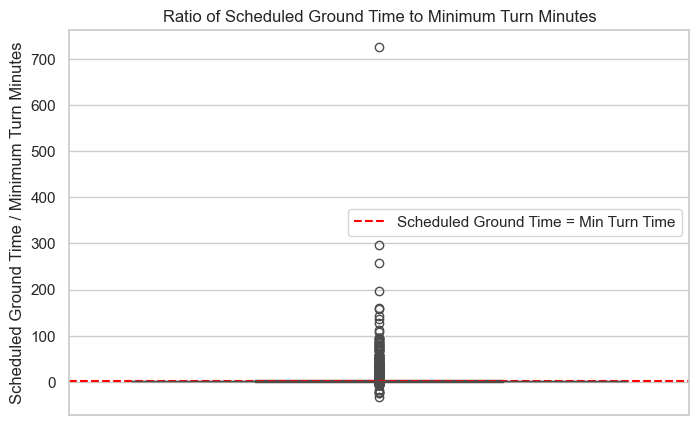

In [171]:
plt.figure(figsize=(8,5))
sns.boxplot(
    y=flight_df['scheduled_ground_time_minutes'] / flight_df['minimum_turn_minutes']
)
plt.axhline(1.0, color='red', linestyle='--', label='Scheduled Ground Time = Min Turn Time')
plt.title("Ratio of Scheduled Ground Time to Minimum Turn Minutes")
plt.ylabel("Scheduled Ground Time / Minimum Turn Minutes")
plt.legend()
plt.show()


In [172]:
bag_df

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,bag_tag_unique_number,bag_tag_issue_date,bag_type
0,UA,1068,2025-08-01,ORD,IAD,BAGTAG_418666,2025-07-27,Transfer
1,UA,622,2025-08-01,ORD,DEN,BAGTAG_418667,2025-07-28,Transfer
2,YX,3718,2025-08-01,ORD,MSN,BAGTAG_84760,2025-07-28,Transfer
3,BA,294,2025-08-01,ORD,LHR,BAGTAG_418669,2025-07-28,Transfer
4,UA,2627,2025-08-01,ORD,MSP,BAGTAG_335257,2025-07-28,Transfer
...,...,...,...,...,...,...,...,...
687240,OO,5138,2025-08-15,ORD,MGW,BAGTAG_668154,2025-08-16,Origin
687241,OO,5138,2025-08-15,ORD,MGW,BAGTAG_335255,2025-08-16,Origin
687242,OO,5138,2025-08-15,ORD,MGW,BAGTAG_335256,2025-08-16,Origin
687243,OO,5138,2025-08-15,ORD,MGW,BAGTAG_168496,2025-08-16,Origin


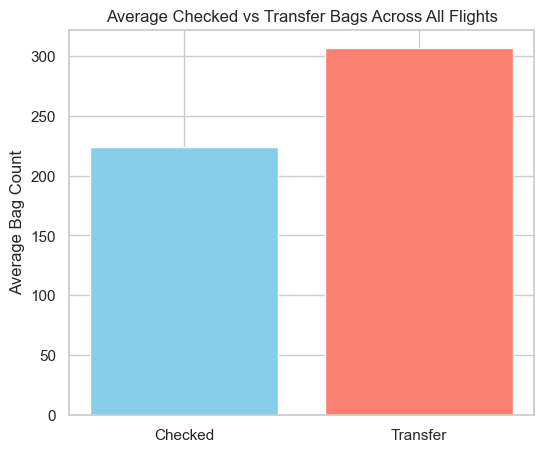

On average, there are 306.66 transfer vs 224.03 checked bags per flight (ratio = 18.66).
Dominant bag type on average: Transfer.


In [193]:
import matplotlib.pyplot as plt

# Map bag types to Checked / Transfer
bag_summary = bag_df.copy()
bag_summary['Checked'] = (bag_summary['bag_type'] == 'Origin').astype(int)
bag_summary['Transfer'] = bag_summary['bag_type'].isin(['Transfer', 'Hot Transfer']).astype(int)

# Aggregate counts per flight
bag_summary = bag_summary.groupby('flight_number')[['Checked','Transfer']].sum().reset_index()

# Compute ratios safely
bag_summary['transfer_to_checked_ratio'] = bag_summary.apply(
    lambda x: x['Transfer'] / x['Checked'] if x['Checked'] != 0 else (x['Transfer'] if x['Transfer'] != 0 else 0),
    axis=1
)

# Compute averages across all flights
avg_checked = bag_summary['Checked'].mean()
avg_transfer = bag_summary['Transfer'].mean()
avg_ratio = bag_summary['transfer_to_checked_ratio'].mean()

# Plot average bag counts using a bar chart
plt.figure(figsize=(6, 5))
plt.bar(['Checked', 'Transfer'], [avg_checked, avg_transfer], color=['skyblue', 'salmon'])
plt.title("Average Checked vs Transfer Bags Across All Flights")
plt.ylabel("Average Bag Count")
plt.show()

# Key Insights
if avg_checked == 0 and avg_transfer > 0:
    print(f"✈️ On average, only transfer bags are present ({avg_transfer:.2f} bags).")
elif avg_transfer == 0 and avg_checked > 0:
    print(f"✈️ On average, only checked bags are present ({avg_checked:.2f} bags).")
else:
    dominant = "Transfer" if avg_transfer > avg_checked else "Checked"
    print(f"On average, there are {avg_transfer:.2f} transfer vs {avg_checked:.2f} checked bags per flight (ratio = {avg_ratio:.2f}).")
    print(f"Dominant bag type on average: {dominant}.")


In [177]:
print(bag_df.columns)


Index(['company_id', 'flight_number', 'scheduled_departure_date_local',
       'scheduled_departure_station_code', 'scheduled_arrival_station_code',
       'bag_tag_unique_number', 'bag_tag_issue_date', 'bag_type'],
      dtype='object')


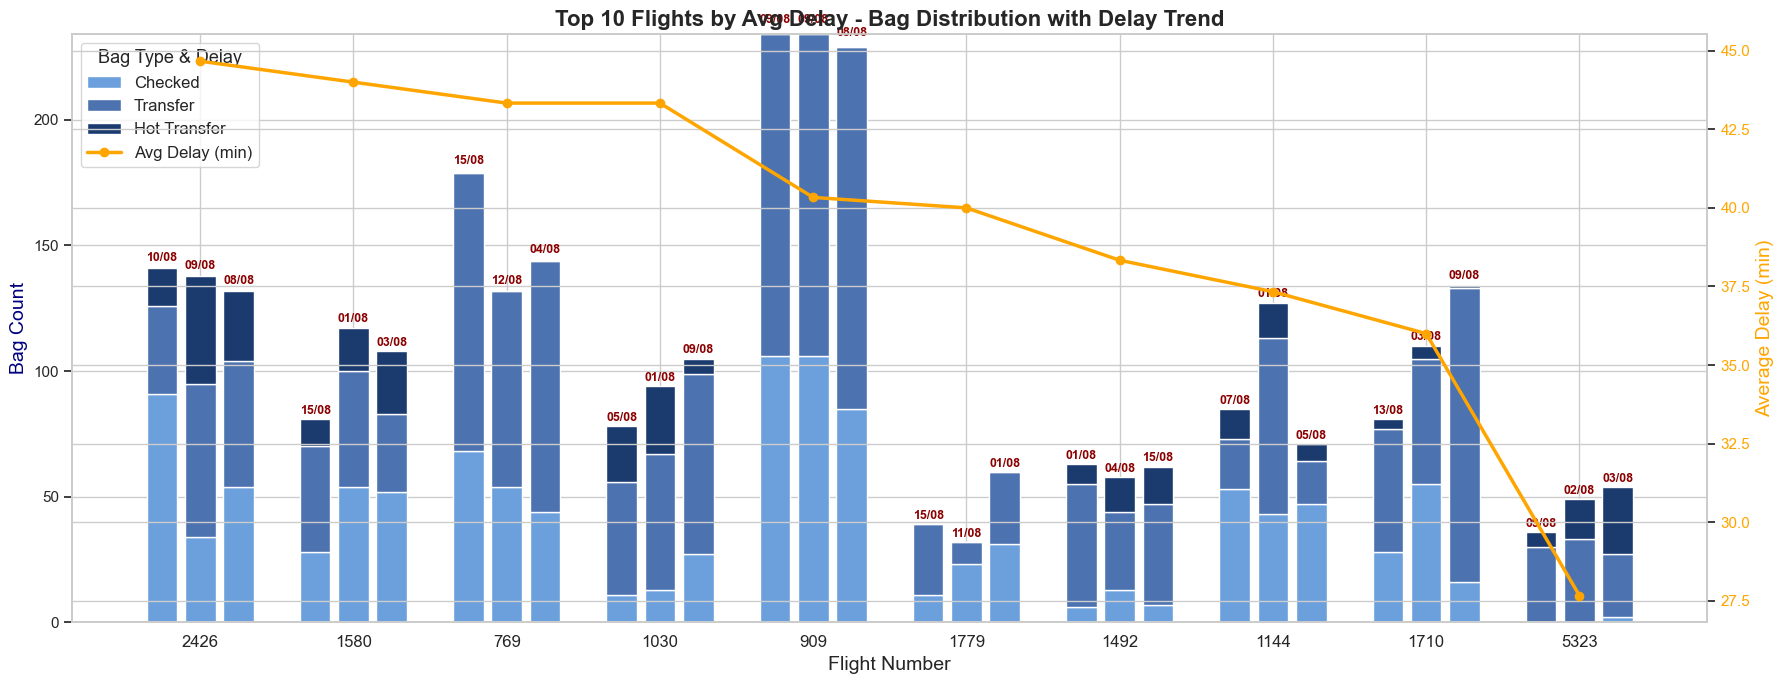

In [178]:
# Remove outliers in departure_delay_min
Q1 = flight_df['departure_delay_min'].quantile(0.25)
Q3 = flight_df['departure_delay_min'].quantile(0.75)
IQR = Q3 - Q1
filtered_flights = flight_df[
    (flight_df['departure_delay_min'] >= Q1 - 1.5*IQR) &
    (flight_df['departure_delay_min'] <= Q3 + 1.5*IQR)
].copy()
filtered_flights['flight_number'] = filtered_flights['flight_number'].astype(str)
filtered_flights['scheduled_departure_date_local'] = filtered_flights['scheduled_departure_date_local'].astype(str)

# Flights with at least 3 different dates
flight_date_counts = filtered_flights.groupby('flight_number')['scheduled_departure_date_local'].nunique()
valid_flights = flight_date_counts[flight_date_counts >= 3].index.tolist()

# Top 10 flights by average delay (based on 3 dates)
avg_delay = filtered_flights[filtered_flights['flight_number'].isin(valid_flights)].groupby('flight_number')['departure_delay_min'].mean()
top_flights_avg = avg_delay.nlargest(10).index.tolist()
top_flights = filtered_flights[filtered_flights['flight_number'].isin(top_flights_avg)].copy()

# Pick top 3 delayed dates per flight
top_dates = top_flights.groupby('flight_number', group_keys=False).apply(
    lambda x: x.nlargest(3, 'departure_delay_min')
).reset_index(drop=True)

# Calculate avg delay per flight (for line graph)
flight_avg_delay = top_dates.groupby('flight_number')['departure_delay_min'].mean()

# Count bags per type for these flights/dates
bag_counts = bag_df[
    (bag_df['flight_number'].astype(str).isin(top_dates['flight_number'])) &
    (bag_df['scheduled_departure_date_local'].astype(str).isin(top_dates['scheduled_departure_date_local']))
].copy()
bag_counts['flight_number'] = bag_counts['flight_number'].astype(str)
bag_counts['scheduled_departure_date_local'] = bag_counts['scheduled_departure_date_local'].astype(str)

bag_counts = bag_counts.groupby(['flight_number', 'scheduled_departure_date_local', 'bag_type']).size().unstack(fill_value=0)
for col in ['Origin', 'Transfer', 'Hot Transfer']:
    if col not in bag_counts.columns:
        bag_counts[col] = 0
bag_counts.rename(columns={'Origin': 'Checked'}, inplace=True)

# Sort flights by descending avg delay
flights_sorted = flight_avg_delay.sort_values(ascending=False).index.tolist()
num_flights = len(flights_sorted)
bar_width = 0.2
gap = 0.05  # space between bars

fig, ax1 = plt.subplots(figsize=(18, 7))

# Bluish theme colors
bag_colors = {
    'Checked': '#6CA0DC',       # soft blue
    'Transfer': '#4C72B0',      # medium blue
    'Hot Transfer': '#1B3B6F'   # deep navy
}

# Plot stacked bars
for i, flight in enumerate(flights_sorted):
    dates = top_dates[top_dates['flight_number'] == flight]['scheduled_departure_date_local'].tolist()
    start_pos = i - ((len(dates)-1)/2)*(bar_width+gap)
    for j, date in enumerate(dates):
        x_pos = start_pos + j*(bar_width+gap)
        if (flight, date) in bag_counts.index:
            counts = bag_counts.loc[(flight, date), ['Checked', 'Transfer', 'Hot Transfer']]
        else:
            counts = pd.Series([0,0,0], index=['Checked','Transfer','Hot Transfer'])
        bottom = 0
        total_bags = counts.sum()
        for k, col in enumerate(['Checked','Transfer','Hot Transfer']):
            ax1.bar(x_pos, counts[col], bottom=bottom, width=bar_width,
                    color=bag_colors[col], label=col if (i==0 and j==0) else "")
            bottom += counts[col]
        # Label each bar with date (DD/MM) + total bags
        day, month = date.split('-')[2], date.split('-')[1]
        date_label = f"{day}/{month}"
        ax1.text(x_pos, bottom + max(2, 0.02*bottom), f"{date_label}",#\n{total_bags} bgs
                 ha='center', fontsize=9, fontweight='bold', color='darkred')

# Primary axis (bags)
ax1.set_xticks(range(num_flights))
ax1.set_xticklabels(flights_sorted, fontsize=12)
ax1.set_xlabel("Flight Number", fontsize=14)
ax1.set_ylabel("Bag Count", fontsize=14, color='navy')

# Secondary axis (average delay line)
ax2 = ax1.twinx()
ax2.plot(range(num_flights), flight_avg_delay[flights_sorted], color='orange',
         marker='o', linewidth=2.5, label='Avg Delay (min)')
ax2.set_ylabel("Average Delay (min)", fontsize=14, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and legend
ax1.set_title("Top 10 Flights by Avg Delay - Bag Distribution with Delay Trend", fontsize=16, fontweight='bold')
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, title='Bag Type & Delay', fontsize=12, title_fontsize=13, loc='upper left')

plt.tight_layout()
plt.show()


In [179]:
print(bag_df['bag_type'].unique())


['Transfer' 'Origin' 'Hot Transfer']


In [180]:
print(bag_counts.columns)


Index(['Hot Transfer', 'Checked', 'Transfer'], dtype='object', name='bag_type')


In [181]:
# Aggregate total passengers per flight
passenger_load = pnr_df.groupby(
    ['flight_number','scheduled_departure_date_local']
)['total_pax'].sum().reset_index()

# Merge with flight_df to get total seats and difficulty proxies
flight_load_df = flight_df.merge(
    passenger_load,
    on=['flight_number','scheduled_departure_date_local'],
    how='left'
)

# Fill any missing passengers with 0 (in case flight has no PNRs)
flight_load_df['total_pax'] = flight_load_df['total_pax'].fillna(0)


In [182]:
# Load factor = total passengers / total seats
flight_load_df['load_factor'] = flight_load_df['total_pax'] / flight_load_df['total_seats']


In [183]:
flight_load_df['operational_difficulty'] = flight_load_df['departure_delay_min'] + flight_load_df['ground_time_pressure'].fillna(0)


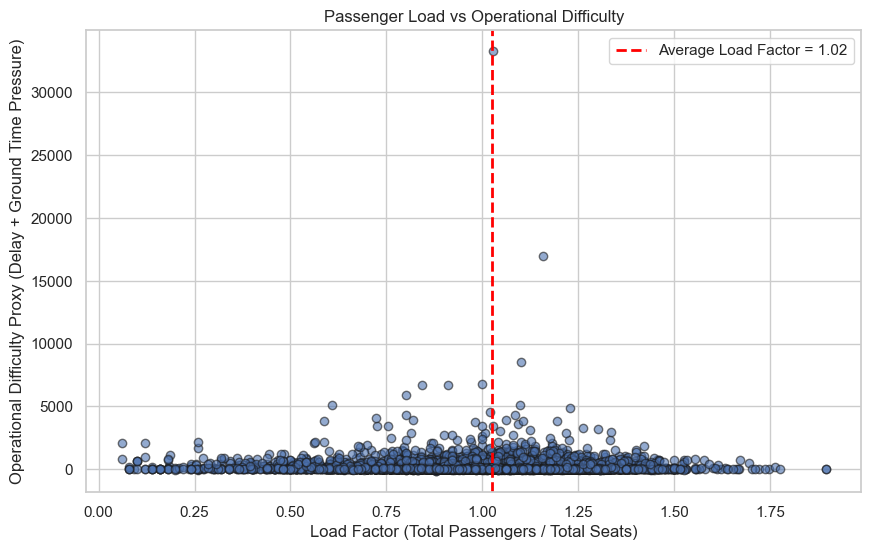

In [184]:
plt.figure(figsize=(10,6))
plt.scatter(
    flight_load_df['load_factor'], 
    flight_load_df['operational_difficulty'], 
    alpha=0.6, edgecolor='k'
)
avg_load = flight_load_df['load_factor'].mean()
plt.axvline(avg_load, color='red', linestyle='dashed', linewidth=2, label=f'Average Load Factor = {avg_load:.2f}')
plt.title("Passenger Load vs Operational Difficulty")
plt.xlabel("Load Factor (Total Passengers / Total Seats)")
plt.ylabel("Operational Difficulty Proxy (Delay + Ground Time Pressure)")
plt.legend()
plt.grid(True)
plt.show()


In [185]:
correlation = flight_load_df[['load_factor','operational_difficulty']].corr().iloc[0,1]
print(f"Correlation between load factor and operational difficulty: {correlation:.2f}")


Correlation between load factor and operational difficulty: -0.03


In [186]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets (assuming already loaded)
# flight_df, remarks_df

# Step 1: Count special service requests per flight and PNR
ssr_counts = remarks_df.groupby(['flight_number','pnr_creation_date'])['special_service_request'].count().reset_index()
ssr_counts.rename(columns={'special_service_request': 'total_ssr'}, inplace=True)

# Step 2: Aggregate SSRs at the flight level
ssr_per_flight = ssr_counts.groupby('flight_number')['total_ssr'].sum().reset_index()

# Step 3: Merge with flight-level data
flight_ssr_df = flight_df.merge(ssr_per_flight, on='flight_number', how='left')

# Step 4: Fill NaNs safely (no chained assignment)
flight_ssr_df['total_ssr'] = flight_ssr_df['total_ssr'].fillna(0)

# Step 5: Compute SSRs per passenger
flight_ssr_df['ssr_per_pax'] = flight_ssr_df['total_ssr'] / flight_ssr_df['total_seats']

# Step 6: Correlation between SSR per passenger and departure delay
corr = flight_ssr_df[['ssr_per_pax','departure_delay_min']].corr().iloc[0,1]
print("Correlation between SSR per passenger and departure delay:", round(corr,3))

Correlation between SSR per passenger and departure delay: 0.06


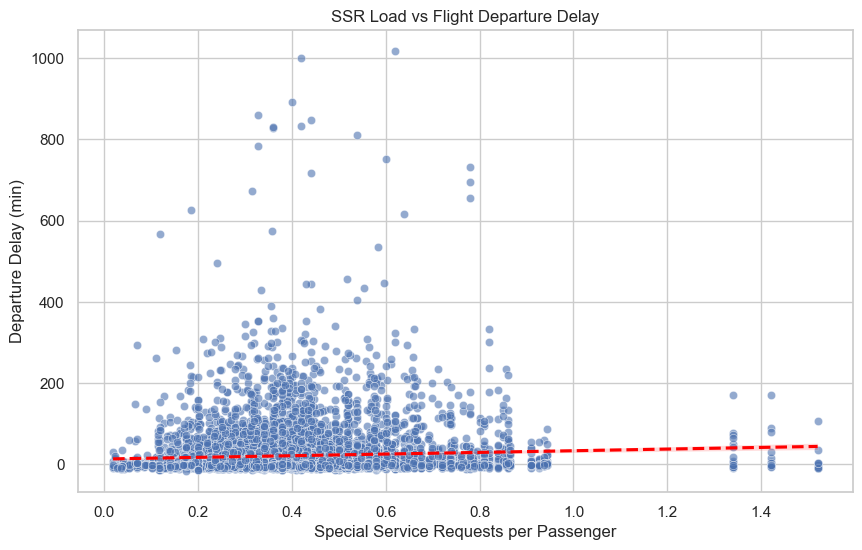

In [187]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=flight_ssr_df, x='ssr_per_pax', y='departure_delay_min', alpha=0.6)
sns.regplot(data=flight_ssr_df, x='ssr_per_pax', y='departure_delay_min', scatter=False, color='red', line_kws={'linestyle':'dashed'})
plt.xlabel("Special Service Requests per Passenger")
plt.ylabel("Departure Delay (min)")
plt.title("SSR Load vs Flight Departure Delay")
plt.grid(True)
plt.show()


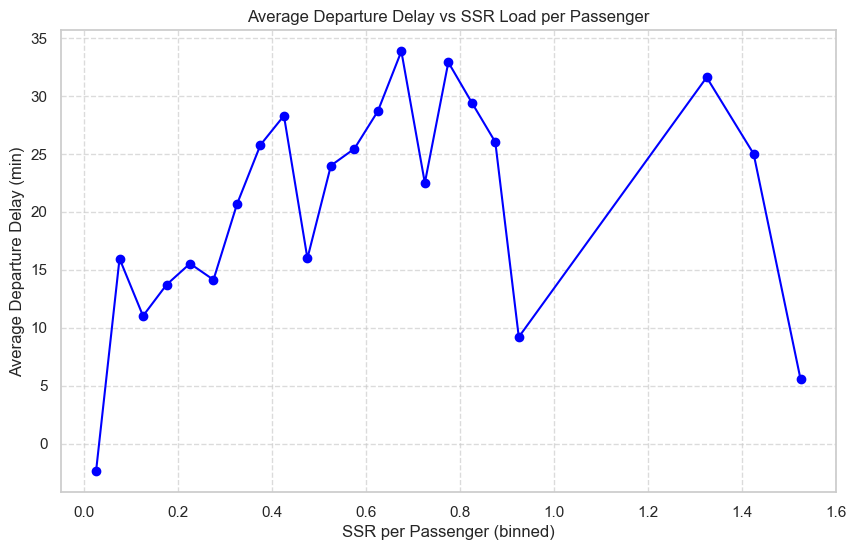

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Create bins for SSR per passenger
bins = np.arange(0, flight_ssr_df['ssr_per_pax'].max() + 0.05, 0.05)
flight_ssr_df['ssr_bin'] = pd.cut(flight_ssr_df['ssr_per_pax'], bins)

# Step 2: Compute average delay per bin (observed=True silences the warning)
bin_summary = flight_ssr_df.groupby('ssr_bin', observed=True)['departure_delay_min'].mean().reset_index()

# Step 3: Prepare bin centers for x-axis
bin_summary['bin_center'] = bin_summary['ssr_bin'].apply(lambda x: x.left + (x.right - x.left)/2)

# Step 4: Plot line graph
plt.figure(figsize=(10,6))
plt.plot(bin_summary['bin_center'], bin_summary['departure_delay_min'], marker='o', linestyle='-', color='blue')
plt.xlabel("SSR per Passenger (binned)")
plt.ylabel("Average Departure Delay (min)")
plt.title("Average Departure Delay vs SSR Load per Passenger")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


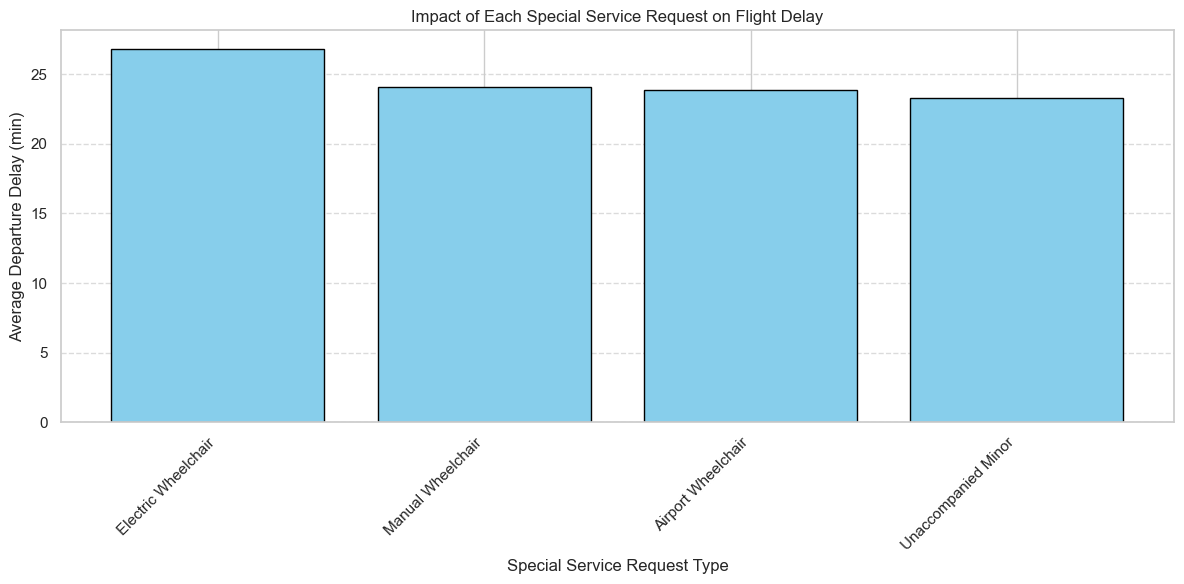

In [189]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Merge remarks with flight delay info
remarks_delay_df = remarks_df.merge(flight_df[['flight_number','departure_delay_min']], on='flight_number', how='left')

# Step 2: Group by special service request
ssr_impact = remarks_delay_df.groupby('special_service_request')['departure_delay_min'].mean().reset_index()

# Step 3: Sort by average delay descending
ssr_impact = ssr_impact.sort_values('departure_delay_min', ascending=False)

# Step 4: Plot
plt.figure(figsize=(12,6))
plt.bar(ssr_impact['special_service_request'], ssr_impact['departure_delay_min'], color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Departure Delay (min)")
plt.xlabel("Special Service Request Type")
plt.title("Impact of Each Special Service Request on Flight Delay")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
